In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df1 = pd.read_csv("Influencer.csv")
df1.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [10]:
df1.shape

(200, 10)

In [11]:
df1.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [12]:
df2 = df1.copy()

In [17]:
# Function to convert string values with 'k' or 'm' suffix to numerical values
def convert_to_numeric(value):
    if 'b' in value:
        return float(value.replace('b', '')) * 1e9
    
    elif 'm' in value:
        return float(value.replace('m', '')) * 1e6
    elif 'k' in value:
        return float(value.replace('k', '')) * 1e3
    else:
        return float(value)

# Apply the function to the 'Avg. Likes' column
df2["Avg. Likes"] = df1["Avg. Likes"].apply(convert_to_numeric)
df2["Followers"] = df1["Followers"].apply(convert_to_numeric)
df2["Posts"] = df1["Posts"].apply(convert_to_numeric)
df2["New Post Avg. Likes"] = df1["New Post Avg. Likes"].apply(convert_to_numeric)
df2["Total Likes"] = df1["Total Likes"].apply(convert_to_numeric)
# Now 'Avg. Likes' column contains numerical values
print(df2.head())

   Rank   Channel Info  Influence Score    Followers  Avg. Likes   Posts  \
0     1    \ncristiano               92  485200000.0   8700000.0  3400.0   
1     2    kyliejenner               91  370700000.0   8200000.0  7000.0   
2     3     \nleomessi               90  363900000.0   6700000.0   915.0   
3     4  \nselenagomez               93  348800000.0   6100000.0  1900.0   
4     5      \ntherock               91  339400000.0   1800000.0  6800.0   

   60-Day Eng Rate  New Post Avg. Likes   Total Likes Country Or Region  
0            0.013            6300000.0  2.910000e+10             Spain  
1            0.014            5000000.0  5.740000e+10     United States  
2            0.010            3500000.0  6.100000e+09               NaN  
3            0.005            1700000.0  1.140000e+10     United States  
4            0.003             932000.0  1.260000e+10     United States  


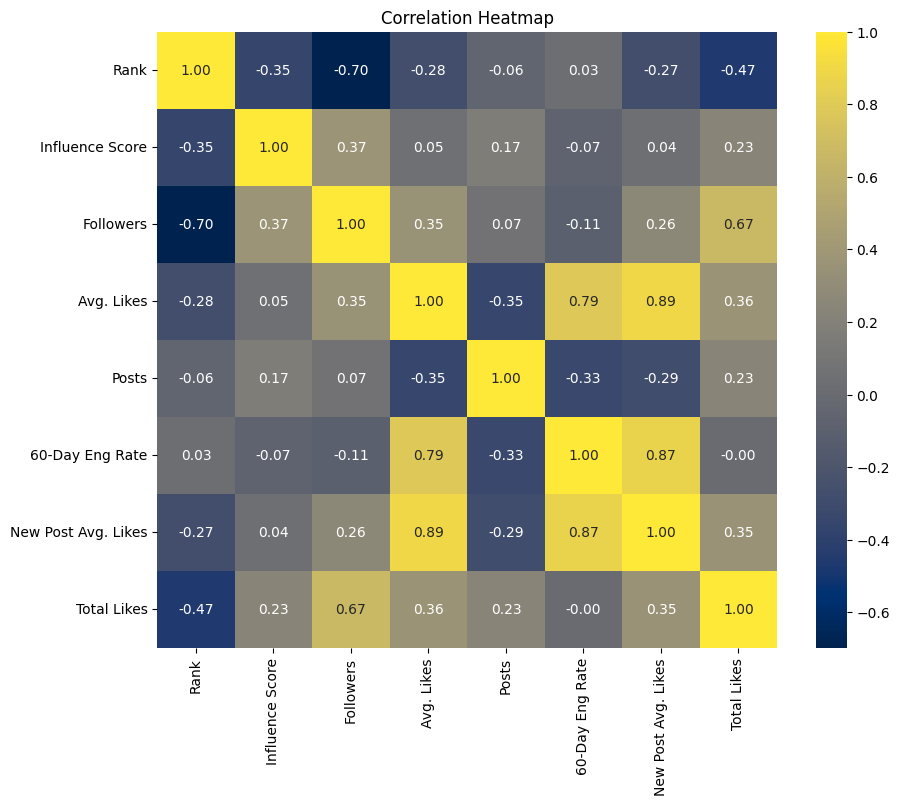

In [22]:
columns = ["Rank", "Influence Score", "Followers", "Avg. Likes", "Posts", "60-Day Eng Rate", "New Post Avg. Likes", "Total Likes"]

correlation_matrix = df2.loc[:, columns].corr()

correlation_matrix.head()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True,cmap="cividis", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



#### 1 . Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

In [24]:
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # You can adjust the threshold as needed
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j],
                                             correlation_matrix.iloc[i, j]))

# Print highly correlated pairs and their correlation coefficients
if len(highly_correlated_pairs) > 0:
    print("Highly correlated features and their correlation coefficients:")
    for pair in highly_correlated_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]}")
else:
    print("No highly correlated features found.")




Highly correlated features and their correlation coefficients:
60-Day Eng Rate - Avg. Likes: 0.7893592803922145
New Post Avg. Likes - Avg. Likes: 0.8927840403263658
New Post Avg. Likes - 60-Day Eng Rate: 0.8662931596052071


#### 2 . What is the frequency distribution of the following features?

#### ○ Influence Score
#### ○ Followers
#### ○ Posts

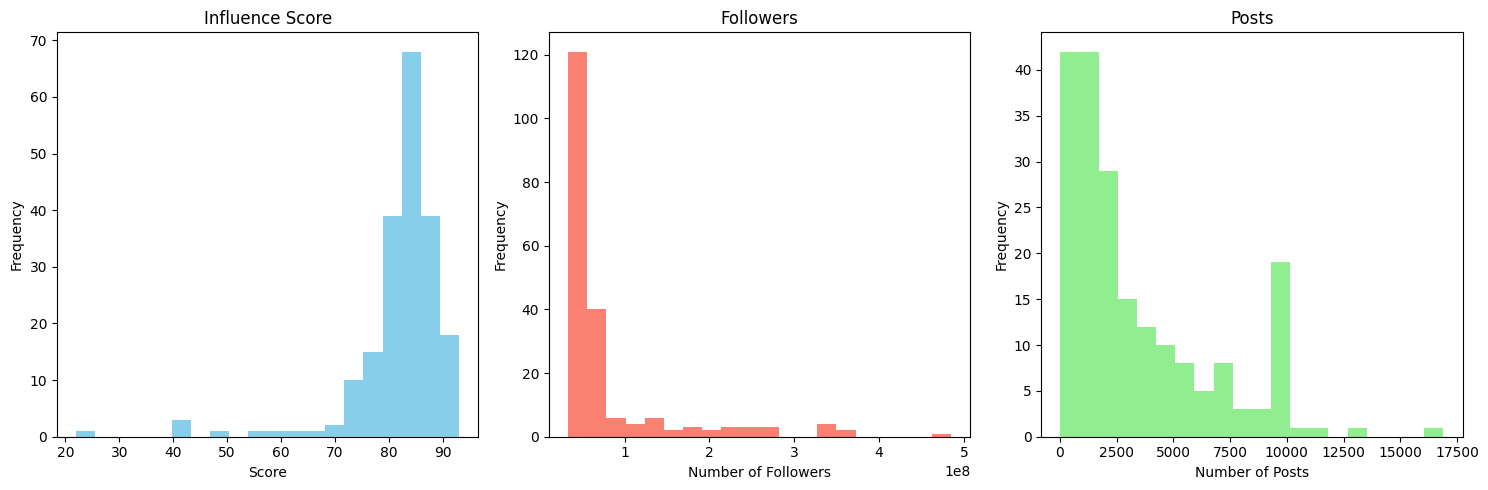

In [30]:
plt.figure(figsize=(15, 5))

# Influence Score
plt.subplot(1, 3, 1)
plt.hist(df2["Influence Score"], bins=20, color='skyblue')
plt.title('Influence Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Followers
plt.subplot(1, 3, 2)
plt.hist(df2["Followers"], bins=20, color='salmon')
plt.title('Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')

# Posts
plt.subplot(1, 3, 3)
plt.hist(df2["Posts"], bins=20, color='lightgreen')
plt.title('Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

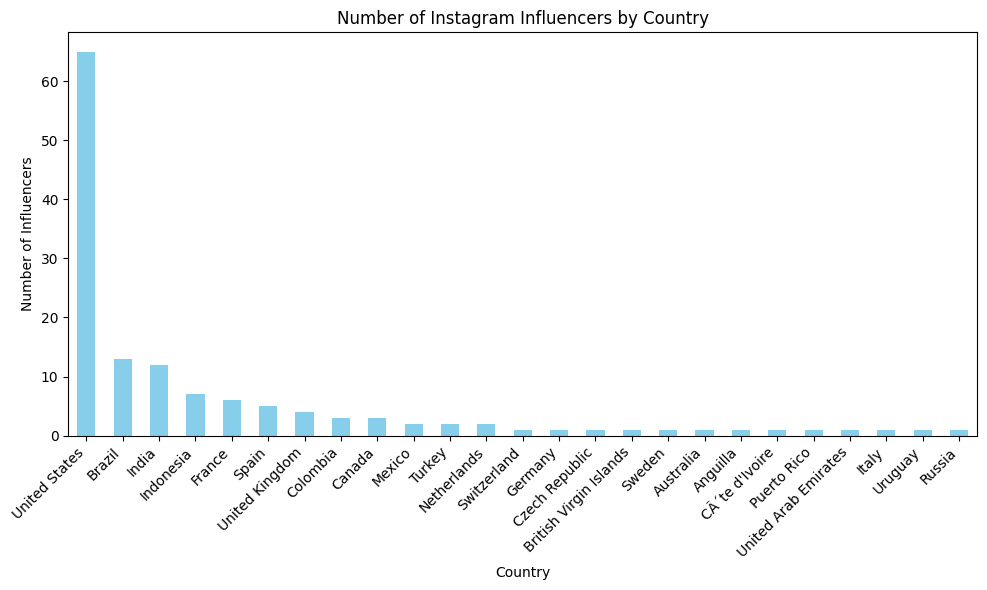

United States has the highest number of Instagram influencers


In [35]:
country_counts = df2["Country Or Region"].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Instagram Influencers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Finding the country with the highest number of influencers
highest_country = country_counts.idxmax()
print(f"{highest_country} has the highest number of Instagram influencers")

#### Who are the top 10 influencers in the given dataset based on the following features
#### ● Followers
#### ● Average likes
#### ● Total Likes

In [34]:
# Top 10 influencers based on Followers
top_followers = df2.nlargest(10, 'Followers')

# Top 10 influencers based on Average Likes
top_avg_likes = df2.nlargest(10, 'Avg. Likes')

# Top 10 influencers based on Total Likes
top_total_likes = df2.nlargest(10, 'Total Likes')

# Displaying the top influencers for each feature
print("Top 10 influencers based on Followers:")
print(top_followers[['Rank', 'Channel Info', 'Followers']])
print()

print("Top 10 influencers based on Average Likes:")
print(top_avg_likes[['Rank', 'Channel Info', 'Avg. Likes']])
print()

print("Top 10 influencers based on Total Likes:")
print(top_total_likes[['Rank', 'Channel Info', 'Total Likes']])

Top 10 influencers based on Followers:
   Rank       Channel Info    Followers
0     1        \ncristiano  485200000.0
1     2        kyliejenner  370700000.0
2     3         \nleomessi  363900000.0
3     4      \nselenagomez  348800000.0
4     5          \ntherock  339400000.0
5     6     \narianagrande  333000000.0
6     7    \nkimkardashian  330700000.0
7     8          \nbeyonce  276100000.0
8     9  \nkhloekardashian  273900000.0
9    10     \njustinbieber  260000000.0

Top 10 influencers based on Average Likes:
     Rank    Channel Info  Avg. Likes
96     97           \nthv  15400000.0
131   132           \nj.m  14400000.0
165   166         \nrkive  10600000.0
0       1     \ncristiano   8700000.0
32     33  \nbillieeilish   8400000.0
1       2     kyliejenner   8200000.0
2       3      \nleomessi   6700000.0
3       4   \nselenagomez   6100000.0
38     39  \nlalalalisa_m   6000000.0
22     23       \nzendaya   5900000.0

Top 10 influencers based on Total Likes:
    Rank     Chan

#### Describe the relationship between the following pairs of features using a suitable graph
#### ● Followers and Total Likes
#### ● Followers and Influence Score
#### ● Posts and Average likes
#### ● Posts and Influence Score

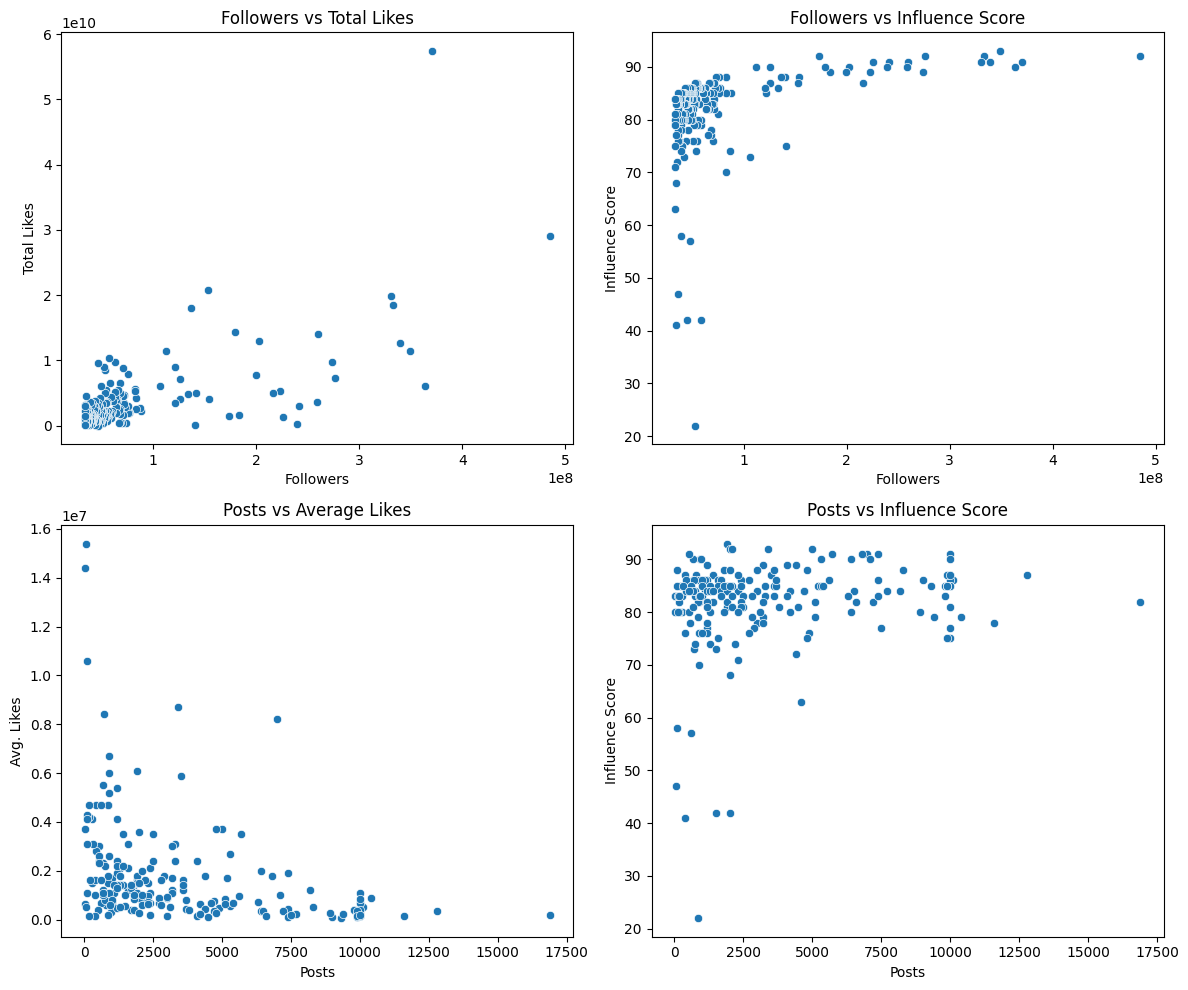

In [37]:
# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for Followers vs Total Likes
sns.scatterplot(x='Followers', y='Total Likes', data=df2, ax=axes[0, 0])
axes[0, 0].set_title('Followers vs Total Likes')

# Scatter plot for Followers vs Influence Score
sns.scatterplot(x='Followers', y='Influence Score', data=df2, ax=axes[0, 1])
axes[0, 1].set_title('Followers vs Influence Score')

# Scatter plot for Posts vs Average Likes
sns.scatterplot(x='Posts', y='Avg. Likes', data=df2, ax=axes[1, 0])
axes[1, 0].set_title('Posts vs Average Likes')

# Scatter plot for Posts vs Influence Score
sns.scatterplot(x='Posts', y='Influence Score', data=df2, ax=axes[1, 1])
axes[1, 1].set_title('Posts vs Influence Score')

# Adjust layout
plt.tight_layout()
plt.show()